# Boosting Techniques

1. What is Boosting in Machine Learning? Explain how it improves weak
learners.

- Boosting is an ensemble learning technique in machine learning that combines multiple weak learners to create a strong predictive model. A weak learner is a model that performs slightly better than random guessing.

Boosting works by training models sequentially. Each new model focuses more on the data points that were incorrectly predicted by previous models. By giving more importance (weight) to difficult samples, boosting gradually improves overall performance.

2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

- AdaBoost:

Trains models sequentially.

Increases weights of misclassified samples.

Focuses directly on incorrectly predicted data points.

Uses weighted voting for final prediction.

- Gradient Boosting:

Trains models sequentially as well.

Each new model learns from the residual errors of the previous model.

Uses gradient descent to minimize loss function.

More flexible and powerful than AdaBoost.

3. How does regularization help in XGBoost?


- Regularization in XGBoost helps prevent overfitting by controlling model complexity. XGBoost includes both L1 (Lasso) and L2 (Ridge) regularization techniques.

Regularization:

Penalizes complex trees

Controls tree depth and leaf weights

Improves generalization on unseen data

By adding regularization terms to the loss function, XGBoost produces more stable and accurate models.

4. Why is CatBoost considered efficient for handling categorical data?

- CatBoost is efficient for handling categorical data because it can process categorical features directly without requiring manual encoding like one-hot encoding.

Key advantages:

Uses target-based encoding internally

Prevents data leakage

Handles missing values automatically

Reduces preprocessing effort

5. What are some real-world applications where boosting techniques are preferred over bagging methods?

- Boosting techniques are preferred in:

Credit risk and loan default prediction

Fraud detection

Medical diagnosis

Stock price prediction

Customer churn prediction

In [1]:
# 6. AdaBoost Classifier on Breast Cancer Dataset.
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)


Model Accuracy: 0.958041958041958


In [2]:
#7. Gradient Boosting Regressor on California Housing Dataset

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)



R-squared Score: 0.7811978514001833


In [4]:
#8. XGBoost Classifier with Hyperparameter Tuning

from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

param_grid = {'learning_rate': [0.01, 0.1, 0.2]}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid = GridSearchCV(xgb, param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:14:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:14:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:14:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:14:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:14:27] WARNING: /w

Best Parameters: {'learning_rate': 0.1}
Accuracy: 0.951048951048951


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:14:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


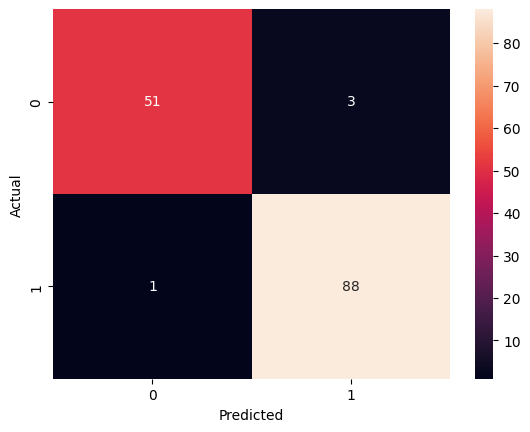

In [7]:
#9. CatBoost Classifier and Confusion Matrix.

!pip install catboost

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

10. You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
- Boosting models help businesses make data-driven and reliable decisions.


- Data Preprocessing:

Handle missing values using median or model-based methods

Encode categorical features (CatBoost preferred)

- Model Choice:

Use CatBoost for mixed data

Use XGBoost for high performance and imbalanced data

- Hyperparameter Tuning:

Use GridSearchCV or RandomizedSearchCV

Tune learning rate, depth, and estimators

Evaluation Metrics:

Precision, Recall, F1-score

ROC-AUC (important for imbalanced data)

- Business Benefit:

Reduces loan default risk

Improves decision accuracy

Saves financial losses

Enhances customer trust